### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [62]:
# Import the required python libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [63]:
# load the csv file in data freame  and dsiplay the info
data = pd.read_csv('data/coupons.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [64]:
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2210,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,36,Married partner,...,never,4~8,4~8,1~3,1,1,0,0,1,0
2898,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,1~3,1~3,1~3,less1,1,0,0,0,1,1
5130,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),1d,Male,21,Single,...,never,4~8,less1,never,1,1,0,0,1,0
8796,Home,Partner,Sunny,80,6PM,Coffee House,1d,Male,26,Married partner,...,NaN,1~3,1~3,less1,1,0,0,1,0,0
6740,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,4~8,less1,less1,never,1,0,0,1,0,1
5607,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,below21,Single,...,less1,gt8,1~3,never,1,0,0,1,0,1
9001,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(20-50),1d,Male,below21,Single,...,gt8,1~3,1~3,less1,1,1,0,0,1,0
8274,Work,Alone,Snowy,30,7AM,Restaurant(<20),2h,Female,36,Married partner,...,never,4~8,1~3,less1,1,1,1,0,1,0
10509,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,50plus,Married partner,...,4~8,1~3,4~8,1~3,1,1,0,0,1,1
4758,Work,Alone,Sunny,80,7AM,Coffee House,2h,Female,50plus,Single,...,never,less1,4~8,less1,1,1,0,1,0,0


2. Investigate the dataset for missing or problematic data.

In [65]:
#Find the number of missing data on each column
data.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


3. Decide what to do about your missing data -- drop, replace, other...


##Missing data
| Column | Missing data count |
|---|---|
| car| 12576|
| Bar | 107 |
| CoffeeHouse |	217 |
|CarryAway| 151 |
|RestaurantLessThan20 |130 |
|Restaurant20To50 |189|

### Duplicate Rows

There are 74 duplicate rows

### Action

1. Total data size is 12684
1. Car column has 99% missing data. We can drop this column from
analysis.
2. Rest of the missing data are for number of times customer usage, are less then 1%. We can drop this missing data rows.
1. convert the 'age' column to integer and replace "below21" to 20  and "50plus" to 51.
1.   Remove 72 duplicate rows









In [66]:
# Drop column "car"
df = data.drop(columns=['car'])
# Drop NaN rows
df = df.dropna()
df["age"] = df["age"].replace({"below21": 20 , "50plus": 51})
df["age"] = pd.to_numeric(df["age"], downcast='integer')
# drop duplicate rows
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  int8  
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-null  ob

4. What proportion of the total observations chose to accept the coupon?



In [67]:
# Percentage of driver accepetd the coupon
per_accepted_coupon = (df[df['Y'] == 1]['Y'].count()/df['Y'].count())*100
per_accepted_coupon

56.84184225868244

5. Use a bar plot to visualize the `coupon` column.

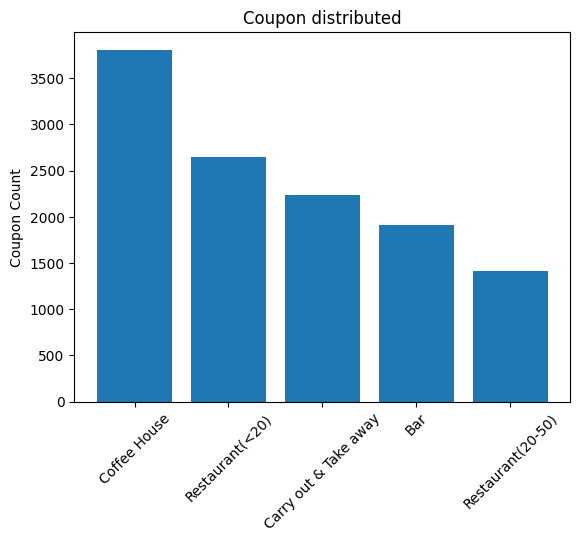

In [68]:
# Bar plot to visualize different types of coupon distributed
plt.bar(df['coupon'].value_counts().index, df['coupon'].value_counts())
plt.ylabel("Coupon Count")
plt.title("Coupon distributed" )
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

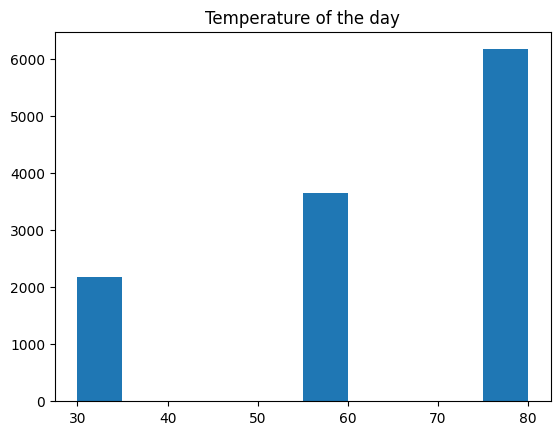

In [69]:
plt.hist(df['temperature'])
plt.title("Temperature of the day" )
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [70]:
# Create a data rame with Bar type Coupon only
df_bar = df.loc[df['coupon'] == 'Bar']
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1906 non-null   object
 1   passanger             1906 non-null   object
 2   weather               1906 non-null   object
 3   temperature           1906 non-null   int64 
 4   time                  1906 non-null   object
 5   coupon                1906 non-null   object
 6   expiration            1906 non-null   object
 7   gender                1906 non-null   object
 8   age                   1906 non-null   int8  
 9   maritalStatus         1906 non-null   object
 10  has_children          1906 non-null   int64 
 11  education             1906 non-null   object
 12  occupation            1906 non-null   object
 13  income                1906 non-null   object
 14  Bar                   1906 non-null   object
 15  CoffeeHouse           1906 non-null   obj

2. What proportion of bar coupons were accepted?


In [71]:
# Finding the percentage of Bar coupon accepted out of all distributed Bar Coupons
per_bar_coupon_accepted = (df_bar[df_bar['Y'] == 1]['Y'].count()/df_bar['Y'].count())*100
per_bar_coupon_accepted

41.185729275970616

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [72]:
# create two lists, one for 3 or fewer and other for more than 3
list_fewer_3 = ["never","less1","1~3"]
list_more_3 = ["4~8","gt8"]
# Find the % of acceptance rate
accepted_bar_few3 = (df_bar[df_bar['Bar'].isin(list_fewer_3) & (df_bar["Y"] == 1)]['Y'].count()/df_bar['Y'].count())*100
accepted_bar_more3 = (df_bar[df_bar['Bar'].isin(list_more_3) & (df_bar["Y"] == 1)]['Y'].count()/df_bar['Y'].count())*100
print(accepted_bar_few3)
print(accepted_bar_more3)

33.47324239244492
7.712486883525709


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [73]:
# Create a list for more than once a month
list_more_1 = ["1~3","4~8","gt8"]
# Find % of acceptance
df_bar_age_gt25 = (df_bar[df_bar['Bar'].isin(list_more_1) & (df_bar['age'] > 25) &
                          (df_bar["Y"] == 1)]['Y'].count()/df_bar['Y'].count())*100
print(df_bar_age_gt25)
all_other_to_bar = (df_bar[df_bar["Y"] == 1]['Y'].count()/df_bar['Y'].count())*100 - df_bar_age_gt25
print(all_other_to_bar)

14.58551941238195
26.600209863588667


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [74]:
# Print categories under "maritalStatus and "passanger" "
print(df_bar["maritalStatus"].value_counts())
print(df_bar["passanger"].value_counts())

df_bar_no_kids_no_farm = (df_bar[df_bar['Bar'].isin(list_more_1) &
 (df_bar['occupation'] != "Farming Fishing & Forestry") &
  (df_bar['passanger'] != "Kid(s)")&
   (df_bar["Y"] == 1)]['Y'].count()/df_bar['Y'].count())*100

print(df_bar_no_kids_no_farm)


maritalStatus
Married partner      826
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: count, dtype: int64
passanger
Alone        1139
Friend(s)     316
Partner       259
Kid(s)        192
Name: count, dtype: int64
19.727177334732424


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [75]:
# Percentage of bar coupon accepted by the driver who goes to bar more then a month
# has no kid passenger and not widowed
df_bar_mt1_nk_nw = (df_bar[df_bar['Bar'].isin(list_more_1) &
 (df_bar['maritalStatus'] != "Widowed") &
  (df_bar['passanger'] != "Kid(s)")&
   (df_bar["Y"] == 1)]['Y'].count()/df_bar['Y'].count())*100

print(df_bar_mt1_nk_nw)

# Percentage of bar coupon accepted by the driver who goes to bar more then a month
# and are under 30 age

df_bar_mt1_u30 = (df_bar[df_bar['Bar'].isin(list_more_1) & (df_bar['age'] < 30) &
 (df_bar["Y"] == 1)]['Y'].count()/df_bar['Y'].count())*100
print(df_bar_mt1_u30)

# Create a list of values in icome catgeory with income < $50K
list_income_lt50k = ["Less than $12500","$12500 - $24999","$25000 - $37499","$37500 - $49999"]

# Find % of acceptance whose income < $50K and goes to cheaper resturant more then 4 times a month
df_bar_mt4_cr_lt50k = (df_bar[df_bar['RestaurantLessThan20'].isin(list_more_3) &
 (df_bar['income'].isin(list_income_lt50k)) & (df_bar["Y"] == 1)]['Y'].count()/df_bar['Y'].count())*100
print(df_bar_mt4_cr_lt50k)


19.727177334732424
12.381951731374606
7.974816369359916


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## **Summary for drivers who acceptaed Bar Coupons**

*   Total 41.19% of the driver accepted Bar coupons out of all Bar Coupons distributed
*   Drivers who accepted Bar coupons, 33.5% of them goes bar 3 or fewer times a month where as 7.68% goes more than 3 times a month
*   14.5% of drivers who accepted goes to Bar more than once and are above the age of 25 years and rest who accepted are 26.65%
*   19.7 % of the driver accepted coupon who goes to Bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
* 19.27 % accepted drivers goes to bars more than once a month, had passengers that were not a kid, and were not widowed
* 12.38% accepted drivers goes to bars more than once a month and are under the age of 30
* 7.7% acepted drivers goes to cheap restaurants more than 4 times a month and income is less than 50K.





### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

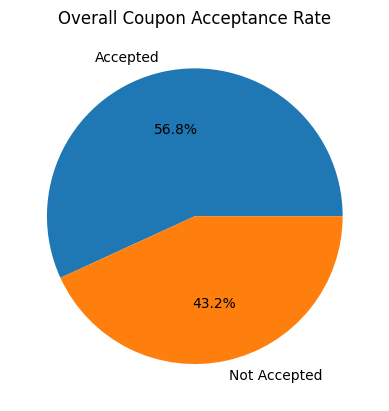

In [76]:
# Find the % of coupon accpetance out of all distributed coupons
per_accepted_coupon = (df[df['Y'] == 1]['Y'].count()/df['Y'].count())*100
per_not_accepted_coupon = 100 - per_accepted_coupon
plt.pie([per_accepted_coupon, per_not_accepted_coupon], labels=['Accepted', 'Not Accepted'], autopct='%1.1f%%')
plt.title("Overall Coupon Acceptance Rate")
plt.show()

[70.97505668934241, 44.65675866949752, 49.5668154371226, 41.185729275970616, 73.5781459919391]


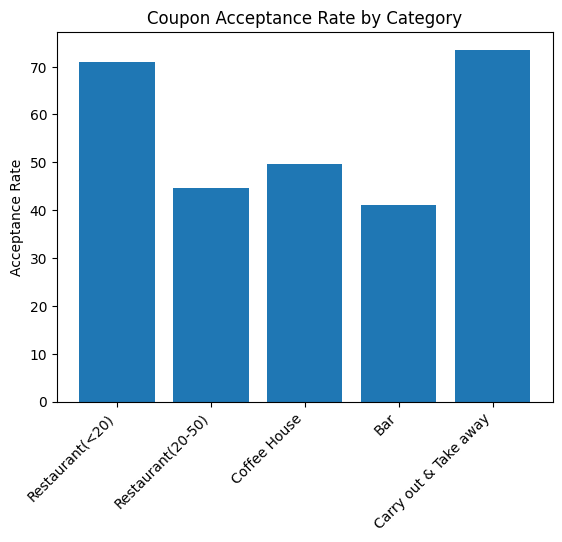

In [77]:
# Find and plot the coupon acceptance rate (%) for each category of coupons distributed

# Restaurant(<20)
per_res_lt20_accepted = (df.loc[df['coupon'] == 'Restaurant(<20)','Y'][df['Y'] == 1].count()/
                         df.loc[df['coupon'] == 'Restaurant(<20)','Y'].count())*100
# Restaurant(20-50)
per_res_20to50_accepted = (df.loc[df['coupon'] == 'Restaurant(20-50)','Y'][df['Y'] == 1].count()/
                           df.loc[df['coupon'] == 'Restaurant(20-50)','Y'].count())*100
# Coffee House
per_coffee_house_accepted = (df.loc[df['coupon'] == 'Coffee House','Y'][df['Y'] == 1].count()/
                             df.loc[df['coupon'] == 'Coffee House','Y'].count())*100
# Bar
per_bar_accepted = (df.loc[df['coupon'] == 'Bar','Y'][df['Y'] == 1].count()/
                    df.loc[df['coupon'] == 'Bar','Y'].count())*100
# Carry out & Take away
per_carry_accepted = (df.loc[df['coupon'] == 'Carry out & Take away','Y'][df['Y'] == 1].count()/
                      df.loc[df['coupon'] == 'Carry out & Take away','Y'].count())*100
list_accepted = [per_res_lt20_accepted, per_res_20to50_accepted, per_coffee_house_accepted, per_bar_accepted, per_carry_accepted]
print(list_accepted)
plt.bar(['Restaurant(<20)', 'Restaurant(20-50)', 'Coffee House', 'Bar', 'Carry out & Take away'], list_accepted)
plt.ylabel("Acceptance Rate") # Add a y-axis label for clarity
plt.title("Coupon Acceptance Rate by Category") # Add a title to the plot
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()


## Outcome on acceptace rate based on category of Coupons
Based on above analysis, CarryAway and Cheaper resturants are having high acceptance rate of greater then 70 %

*   Carry Out and Take away's acceptance is 73.57%
*   Cheaper resturant coupons's acceptance is 70.9%

## Next steps
**Analyze these two highly accepted category of coupons**

In [78]:
# Create data frame for 'Carry out & Take away' and 'Restaurant(<20)' coupons
df_carryaway = df.loc[df['coupon'] == 'Carry out & Take away']
df_cheaperRest = df.loc[df['coupon'] == 'Restaurant(<20)']

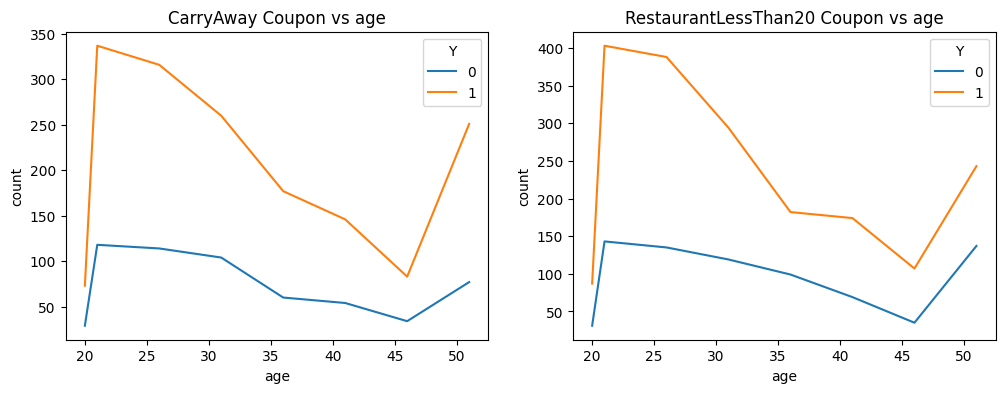

In [79]:
# Plot trend for carryaway coupon acceptance rate based on age of driver
fig, ax = plt.subplots(1,2, figsize=(12, 4),sharex =True)
df_x = df_carryaway[["age","Y"]].value_counts()
df_x = df_x.sort_index(level= 'age')
df_x =df_x.reset_index()
df_x.columns = ["age", "Y", "count"]
sns.lineplot(data = df_x, x='age',y='count', hue = "Y",ax =ax[0])
ax[0].set_title('CarryAway Coupon vs age')

# Plot trend for Cheaper resturant coupon acceptance rate based on age of driver
df_y = df_cheaperRest[["age","Y"]].value_counts()
df_y = df_y.sort_index(level= 'age')
df_y =df_y.reset_index()
df_y.columns = ["age", "Y", "count"]
sns.lineplot(data = df_y, x='age',y='count', hue = "Y",ax =ax[1])
ax[1].set_title('RestaurantLessThan20 Coupon vs age')
plt.show()

## Outcome
From both above plot, it seems driver of age group 21 to 35 are having higher acceptance rate in these two categories of coupons.

In [80]:
#list_more_1 = ["1~3","4~8","gt8"]

accepted_carryAway_mt1 = (df_carryaway[df_carryaway['CarryAway'].isin(list_more_1) &
                                        (df_carryaway["Y"] == 1)]['Y'].count()/df_carryaway['Y'].count())*100

accepted_cheapRest_mt1 = (df_cheaperRest[df_cheaperRest['RestaurantLessThan20'].isin(list_more_1) &
                                         (df_cheaperRest["Y"] == 1)]['Y'].count()/df_cheaperRest['Y'].count())*100

print(accepted_carryAway_mt1)
print(accepted_cheapRest_mt1)


62.47201074787282
58.69236583522298


([0, 1, 2, 3, 4],
 [Text(0, 0, '2PM'),
  Text(1, 0, '7AM'),
  Text(2, 0, '10AM'),
  Text(3, 0, '10PM'),
  Text(4, 0, '6PM')])

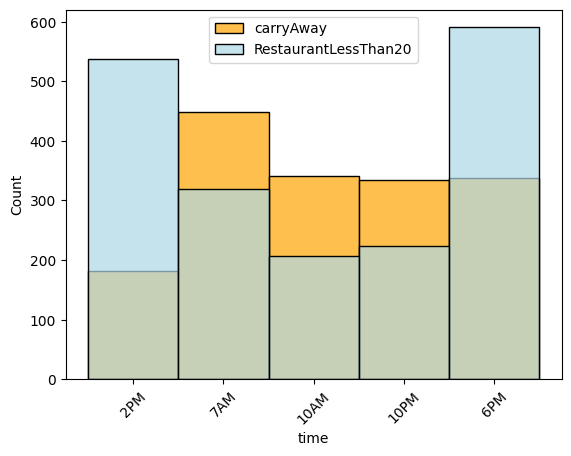

In [81]:
# Find the driving time of the day when these coupons are accepted most
df_ca_time_acceptance = df_carryaway.loc[df_carryaway['Y'] == 1]['time']
df_cr_time_acceptance = df_cheaperRest.loc[df_cheaperRest['Y'] == 1]['time']
sns.histplot(df_ca_time_acceptance, color = 'orange', alpha = 0.7, label = "carryAway")
sns.histplot(df_cr_time_acceptance, color = 'lightblue', alpha = 0.7, label = 'RestaurantLessThan20')
plt.legend()
plt.xticks(rotation=45)

# Outcome
From above analysis, the high acceptance rate are for drivers age between 21 to 35 years:
*   They accept carry away coupons when driving in the morning (7 AM to 10 AM) or in the late night 10 PM or so.
*   They accept cheaper resturant coupons mostly during lunch or dinner time of 2 PM or 6 PM



### Direction of driver same or opposite to destination

In [82]:
df_dir_same = (df_carryaway.loc[df_carryaway['direction_same'] == 1,'Y'][df_carryaway['Y'] == 1].count()/
               df_carryaway['Y'].count())*100

df_dir_opposite = (df_carryaway.loc[df_carryaway["direction_opp"] == 1,'Y'][df_carryaway['Y'] == 1].count()/
                   df_carryaway['Y'].count())*100

print(df_dir_same)
print(df_dir_opposite)

df_dir_same_r = (df_cheaperRest.loc[df_cheaperRest['direction_same'] == 1,'Y'][df_cheaperRest['Y'] == 1].count()/
               df_cheaperRest['Y'].count())*100

df_dir_opposite_r = (df_cheaperRest.loc[df_cheaperRest["direction_opp"] == 1,'Y'][df_cheaperRest['Y'] == 1].count()/
                   df_cheaperRest['Y'].count())*100

print(df_dir_same_r)
print(df_dir_opposite_r)



23.914017017465294
49.664128974473805
11.489040060468632
59.48601662887377


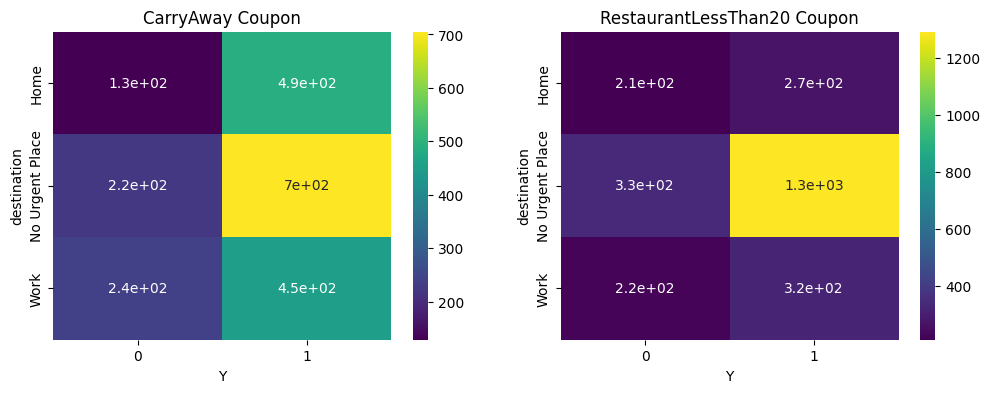

In [83]:
# Generate Heatmap for coupon acceptance of carryaway based on destination
fig, ax = plt.subplots(1, 2, figsize=(12, 4),sharex =True)
cross_tab_ca_dst = pd.crosstab(df_carryaway["destination"], df_carryaway["Y"])
sns.heatmap(cross_tab_ca_dst, annot=True, cmap='viridis', ax=ax[0])
ax[0].set_title('CarryAway Coupon')

# Generate Heatmap for coupon acceptance of Cheap Resturant based on destination
cross_tab_cheapR_dst = pd.crosstab(df_cheaperRest["destination"], df_cheaperRest["Y"])
sns.heatmap(cross_tab_cheapR_dst, annot=True, cmap='viridis',ax =ax[1])
ax[1].set_title('RestaurantLessThan20 Coupon')
plt.show()


## OutCome
Clearly in both the Coupon types, the drivers having no urgent place to go accept the coupons.

## Income based Heatmap

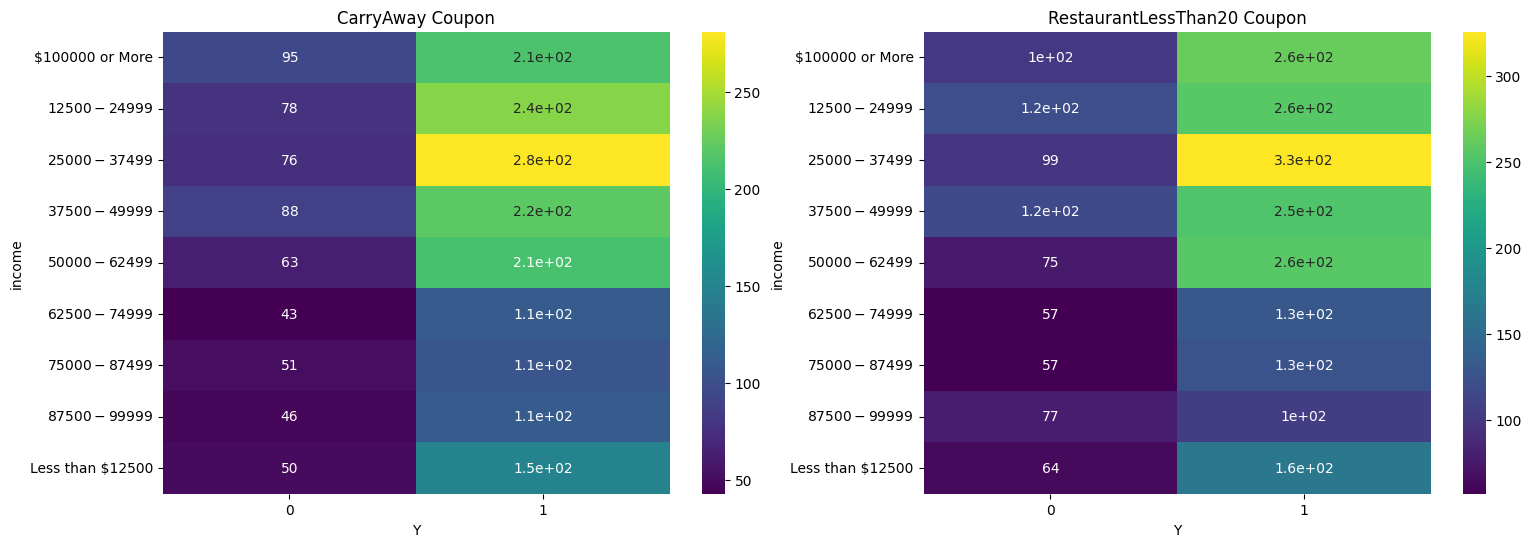

In [84]:
# Generate Heatmap for coupon acceptance of carry away coupons based on Income
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
cross_tab_ca_inc = pd.crosstab(df_carryaway["income"], df_carryaway["Y"])
sns.heatmap(cross_tab_ca_inc, annot=True, cmap='viridis',ax =ax[0])
ax[0].set_title('CarryAway Coupon')

# Generate Heatmap for coupon acceptance of Cheap Resturant based on Income
cross_tab_cheapR_inc = pd.crosstab(df_cheaperRest["income"], df_cheaperRest["Y"])
sns.heatmap(cross_tab_cheapR_inc, annot=True, cmap='viridis',ax =ax[1])
ax[1].set_title('RestaurantLessThan20 Coupon')
plt.show()

##Outcome
Income  less the $50K are more chances of acceptance

## Ocupation based heat map

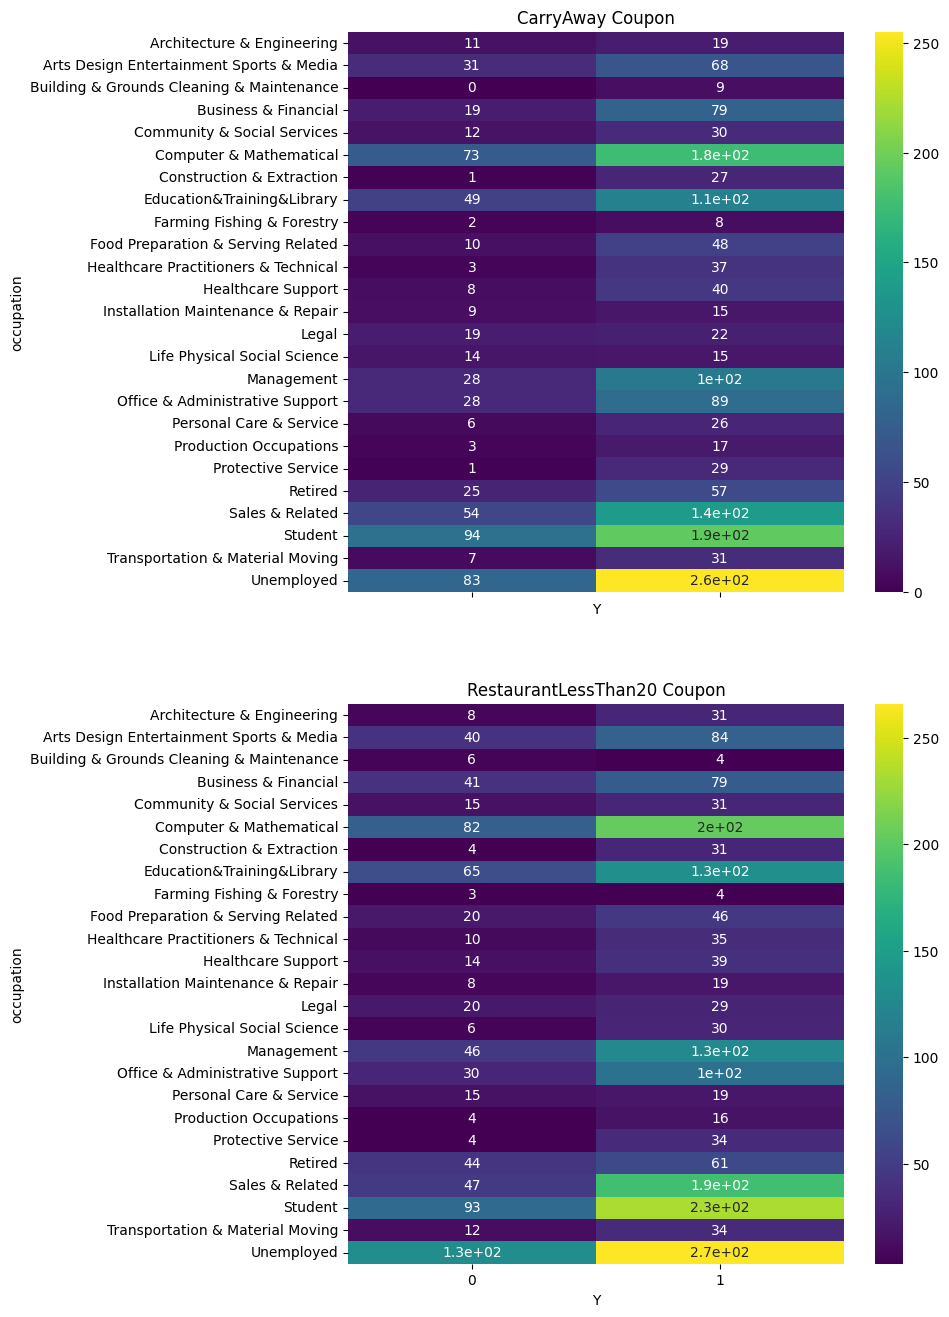

In [85]:
# Generate Heatmap for coupon acceptance of carryaway coupons based on Occupations
fig, ax = plt.subplots(2, 1, figsize=(8, 16),sharex= True)
cross_tab_ca_occ = pd.crosstab(df_carryaway["occupation"], df_carryaway["Y"])
sns.heatmap(cross_tab_ca_occ, annot=True, cmap='viridis', ax =ax[0])
ax[0].set_title('CarryAway Coupon')

# Generate Heatmap for coupon acceptance of Cheap Resturant based on Occupations
cross_tab_cheapR_occ = pd.crosstab(df_cheaperRest["occupation"], df_cheaperRest["Y"])
sns.heatmap(cross_tab_cheapR_occ, annot=True, cmap='viridis', ax =ax[1])
ax[1].set_title('RestaurantLessThan20 Coupon')
plt.show()

## Outcome
For both category of coupons these are the drivers occupation of high acceptance
*   Unemployed
*   Student
*   computer and Mathematics
*   Education training and library
*   Management
*   Office administration support







## Gender based heatmap

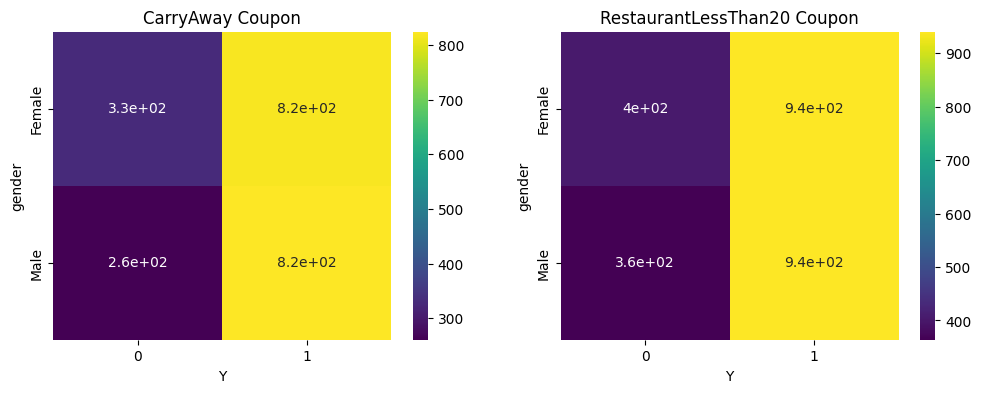

In [86]:
# Generate Heatmap for coupon acceptance of carryaway & Takeout coupons based on gender
fig, ax = plt.subplots(1, 2, figsize=(12, 4),sharex= True)
cross_tab_ca_gender = pd.crosstab(df_carryaway["gender"], df_carryaway["Y"])
sns.heatmap(cross_tab_ca_gender, annot=True, cmap='viridis', ax =ax[0])
ax[0].set_title('CarryAway Coupon')

# Generate Heatmap for coupon acceptance of Cheap Resturant based on gender
cross_tab_cheapR_gender = pd.crosstab(df_cheaperRest["gender"], df_cheaperRest["Y"])
sns.heatmap(cross_tab_cheapR_gender, annot=True, cmap='viridis',ax =ax[1])
ax[1].set_title('RestaurantLessThan20 Coupon')
plt.show()

## Education

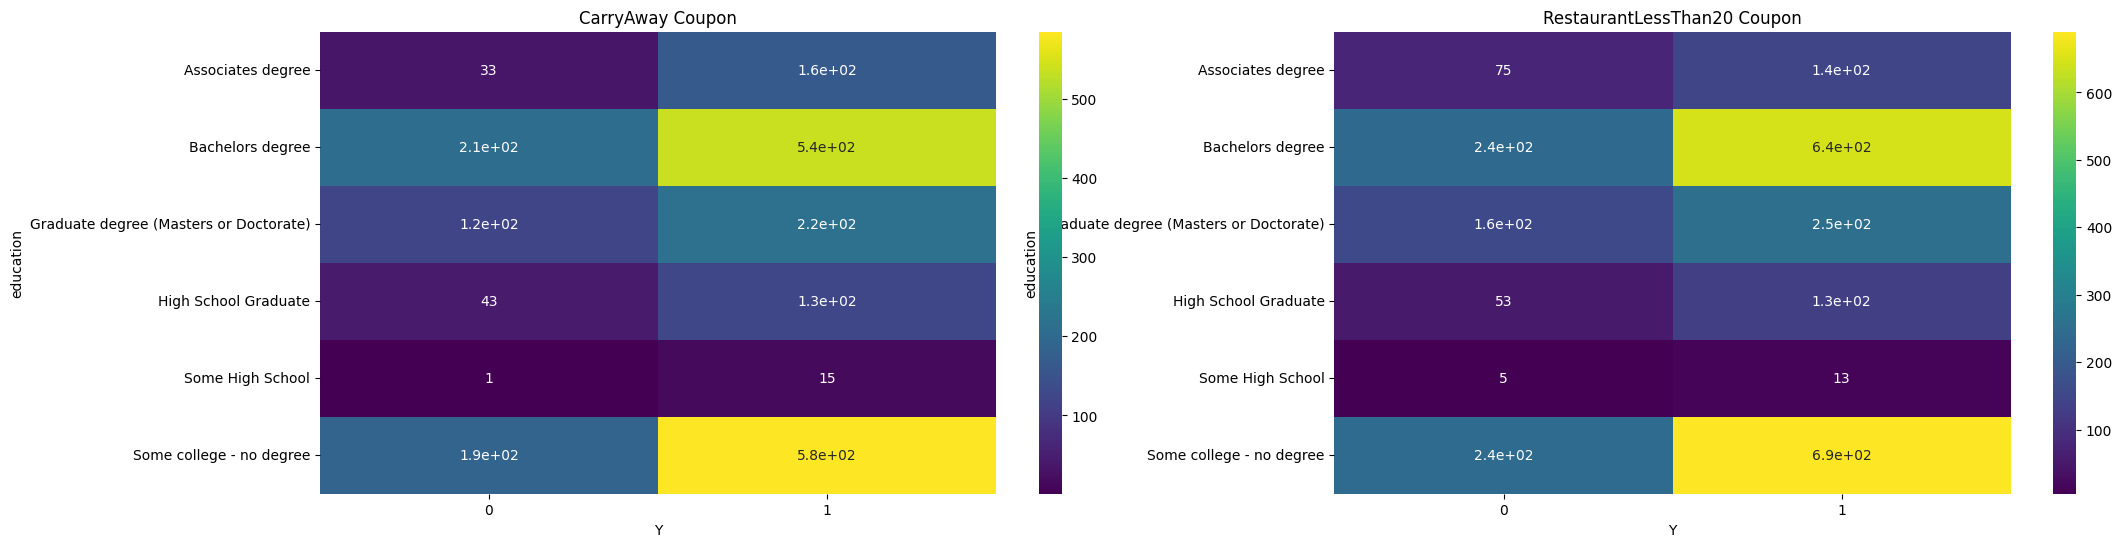

In [87]:
# Generate Heatmap for coupon acceptance of carry away based on education
fig, ax = plt.subplots(1, 2, figsize=(24, 6), sharex =True)
cross_tab_ca_ed = pd.crosstab(df_carryaway["education"], df_carryaway["Y"])
sns.heatmap(cross_tab_ca_ed, annot=True, cmap='viridis', ax=ax[0])
ax[0].set_title('CarryAway Coupon')

# Generate Heatmap for coupon acceptance of Cheap Resturant based on education
cross_tab_cheapR_ed = pd.crosstab(df_cheaperRest["education"], df_cheaperRest["Y"])
sns.heatmap(cross_tab_cheapR_ed, annot=True, cmap='viridis', ax =ax[1])
ax[1].set_title('RestaurantLessThan20 Coupon')
plt.show()

## Outcome
Some college - no degree or bachelor degree has high acceptance rate


## Expiration

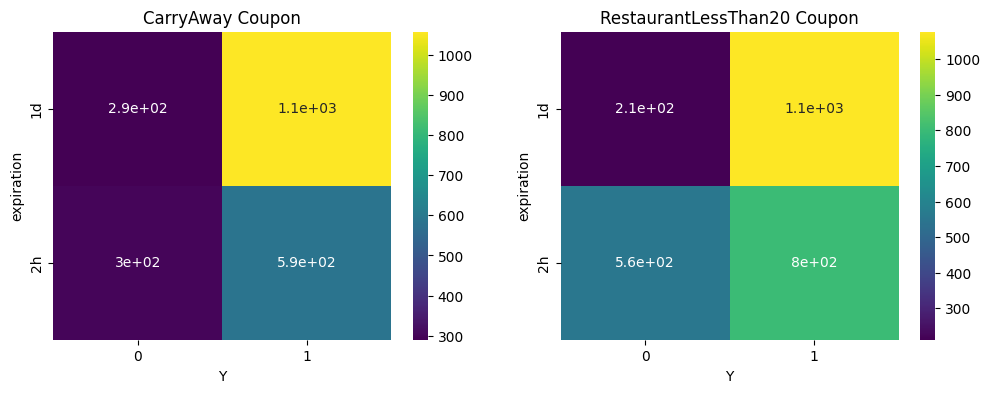

In [88]:
# Generate Heatmap for coupon acceptance of carryaway coupons based on coupon expiration
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex =True)
cross_tab_ca_exp = pd.crosstab(df_carryaway["expiration"], df_carryaway["Y"])
sns.heatmap(cross_tab_ca_exp, annot=True, cmap='viridis', ax = ax[0])
ax[0].set_title('CarryAway Coupon')

# Generate Heatmap for coupon acceptance of Cheap Resturant based on coupon expiration
cross_tab_cheapR_exp = pd.crosstab(df_cheaperRest["expiration"], df_cheaperRest["Y"])
sns.heatmap(cross_tab_cheapR_exp, annot=True, cmap='viridis', ax = ax[1])
ax[1].set_title('RestaurantLessThan20 Coupon')
plt.show()

## Outcome

Coupons valid for 1 day has high acceptace rate

## Does drive distance makes any difference ?
toCoupon_GEQ5min    
toCoupon_GEQ15min   
toCoupon_GEQ25min  

In [89]:
xx = (df_carryaway.loc[df_carryaway['toCoupon_GEQ5min'] == 1,'Y'][df_carryaway['Y'] == 1].count()/
               df_carryaway.loc[df_carryaway['toCoupon_GEQ5min'] == 1,'Y'].count())*100

yy = (df_carryaway.loc[df_carryaway['toCoupon_GEQ15min'] == 1,'Y'][df_carryaway['Y'] == 1].count()/
               df_carryaway.loc[df_carryaway['toCoupon_GEQ15min'] == 1,'Y'].count())*100


zz = (df_carryaway.loc[df_carryaway['toCoupon_GEQ25min'] == 1,'Y'][df_carryaway['Y'] == 1].count()/
               df_carryaway.loc[df_carryaway['toCoupon_GEQ25min'] == 1,'Y'].count())*100
print("CarryAway")
print(xx)
print(yy)
print(zz)

xx_cr = (df_cheaperRest.loc[df_cheaperRest['toCoupon_GEQ5min'] == 1,'Y'][df_cheaperRest['Y'] == 1].count()/
               df_cheaperRest.loc[df_cheaperRest['toCoupon_GEQ5min'] == 1,'Y'].count())*100

yy_cr = (df_cheaperRest.loc[df_cheaperRest['toCoupon_GEQ15min'] == 1,'Y'][df_cheaperRest['Y'] == 1].count()/
               df_cheaperRest.loc[df_cheaperRest['toCoupon_GEQ15min'] == 1,'Y'].count())*100


zz_cr = (df_cheaperRest.loc[df_cheaperRest['toCoupon_GEQ25min'] == 1,'Y'][df_cheaperRest['Y'] == 1].count()/
               df_cheaperRest.loc[df_cheaperRest['toCoupon_GEQ25min'] == 1,'Y'].count())*100

print("Cheaper Resturant")
print(xx_cr)
print(yy_cr)
print(zz_cr)

CarryAway
73.5781459919391
72.55880256593015
74.05660377358491
Cheaper Resturant
70.97505668934241
65.0551314673452
33.21917808219178


# Outcome
It looks like for carry away drive time doesn'y matter for most but for cheap resturant, lesser the drive time, more chances of acceptance

|| toCoupon_GEQ5min | toCoupon_GEQ15min | toCoupon_GEQ25min|
|---|----|-----|----|
| CarryAway|73.58 | 72.56 | 74.05 |
| Cheaper Resturant | 70.97 | 65.05 | 33.22|

# **Overall Summary**  

## Higher acceptance rate

(1) Total Coupon acceptance rate is 56.8%.

(2) Out of all 5 different kind of Coupons, follwing two has the higest  acceptace rate:  
  * "Carry out & Take away" has top acceptance rate of 73.57%
  * "Restaurant(<20)" is the 2nd top with 70.97%

(3) Drivers of age group 21 to 35 are having higher acceptance rate in these two categories of coupons

(4) Roughly 60% of the drivers who accpetd cheaper resturants coupons eats at a restaurant with average expense less than \$20 atlest once a month.

(5) Roughly 60% of drives who accepted carryAway coupons buys takeaway food at least once a month.

(6) The acceptance rate for carry away coupons are higher when driving in the morning (7 AM to 10 AM) or in the late night 10 PM or so.

(7) They accept cheaper resturant coupons mostly when driving during lunch or dinner time of 2 PM or 6 PM

(8) Coupons having expiration of 1 day has higher acceptance rate

(9) Cheaper resturant coupons has higher acceptance rate if lesser distance to drive but it has no bearing on carry away coupons.

(10) Drivers who accepts most are either unemployed or student or earning less than $50K and has no urgent destination to go. Gender has no bearing on acceptance rate.

## Low acceptance rate

(1) 43.2 % of the distributed coupons are not accpted

(2) The coupon with expiration of 2hr has low acceptance

(3) 'Bar' coupons are least aceepted

(4) Drivers with income more than $100K has least acceptance

(5) Driver  going to work are less likely to accecpt coupon

(6) Females acceptance is less than males

